# Barrancas Del Cobre

Maps for <https://mexico.werthmuller.org/besucherreisen/barrancasdelcobre>.

You can find more explanatory examples in Travel.ipynb, also in this directory.

In [4]:
import travelmaps2 as tm
tm.setup(dpi=200)

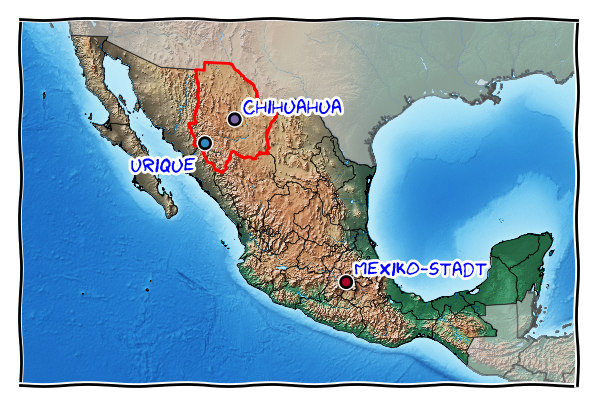

In [2]:
fig_x = tm.plt.figure(figsize=(tm.cm2in([11, 6])))

# Locations
MDF = [19.433333,  -99.133333] # Mexico City
URI = [27.216667, -107.916667] # Urique
CHI = [28.635278, -106.088889] # Chihuahua
# CRE = [27.752258, -107.634608] # Creel
# CUA = [28.405,    -106.866667] # Cuathémoc    

# Create basemap
m_x = tm.Basemap(width=3500000, height=2300000, resolution='c', projection='tmerc', lat_0=24, lon_0=-102)

# Plot image
m_x.warpimage('./data/TravelMap/HYP_HR_SR_OB_DR/HYP_HR_SR_OB_DR.tif')

# Put a shade over non-Mexican countries
countries = ['USA', 'BLZ', 'GTM', 'HND', 'SLV', 'NIC', 'CUB']
tm.country(countries, m_x, fc='.8', ec='.3', lw=.5, alpha=.6)

# Fill states
fcs = 32*['none']
ecs = 32*['k']
lws = 32*[.2,]
tm.country('MEX', bmap=m_x, fc=fcs, ec=ecs, lw=lws, adm=1)
ecs = 32*['none']
ecs[5] = 'r'
lws = 32*[1,]
tm.country('MEX', bmap=m_x, fc=fcs, ec=ecs, lw=lws, adm=1)

# Add visited cities
tm.city(URI, 'Urique', m_x, offs=[-.5, -1.5], halign="right")
tm.city(MDF, 'Mexiko-Stadt', m_x, offs=[.5, .5])
tm.city(CHI, 'Chihuahua', m_x, offs=[.5, .5])
#tm.city(CRE, 'Creel', m_x, offs=[.5, .5])
#tm.city(CUA, 'Cuathemoc', m_x, offs=[.5, .5])

# Save-path
#fpath = '../mexico.werthmuller.org/content/images/barrancasdelcobre/'
#tm.plt.savefig(fpath+'MapUrique.png', bbox_inches='tight')
tm.plt.show()

## Maps with Natural Earth backgrounds

I got the background image from [Natural Earth](http://www.naturalearthdata.com); it is the [10 m, Cross Blended Hypso with Relief, Water, Drains, and Ocean Bottom](http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/raster/HYP_HR_SR_OB_DR.zip). I changed the colour curves slightly in Gimp, to make the image darker.

**Adjustment for Natural Earth:**

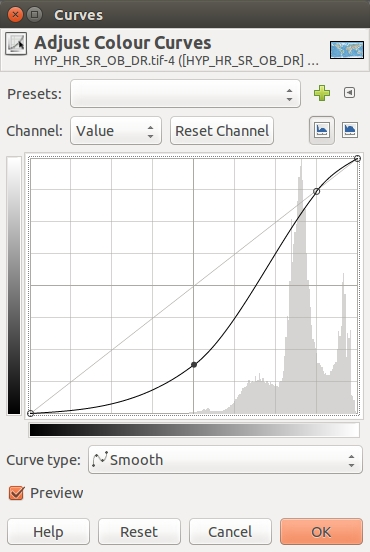

In [3]:
from IPython.display import Image
Image(filename='./data/TravelMap/HYP_HR_SR_OB_DR/Adjustment.jpg') 

## Profile from viewpoint down to Urique
Not used in blog, later added

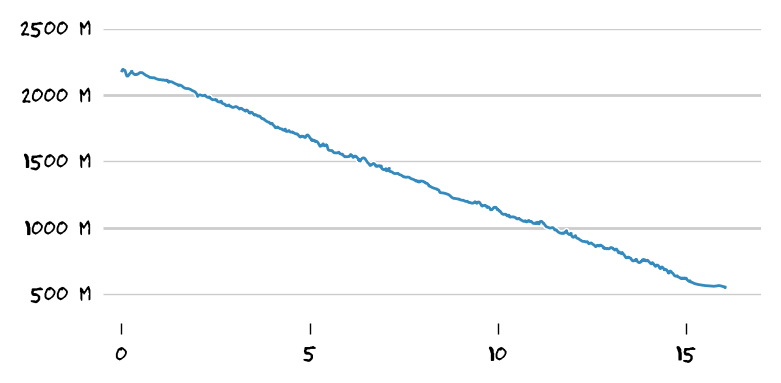

In [13]:
import numpy as np
import matplotlib.pyplot as plt
fig_p,ax = plt.subplots(figsize=(tm.cm2in([10.8, 5])))

# Switch off axis and ticks
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')

# Get data
pdat = np.loadtxt('./data/Mexico/ProfileUrique.txt', skiprows=1)

# Ticks, hlines, axis
plt.yticks(np.arange(1,6)*500, ('500 m', '1000 m', '1500 m', '2000 m', '2500 m'))
plt.hlines([1000, 2000], -.5, 17, colors='.8')
plt.hlines([500, 1500, 2500], -.5, 17, colors='.8', lw=.5)
plt.axis([-.5, 17, 200, 2500])

# Sum up differences to get distance, distance starts now at every waypoint
distance = np.cumsum(pdat[:,4])/1000

# Plot data
plt.plot(distance, pdat[:, 2])
plt.show()